In [44]:
import pandas as pd
data = pd.read_csv("Studentgrades.csv")
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,Final,12 or above?
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4,1,1,3,4,11,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,1,1,3,2,11,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,4,3,2,2,3,3,6,12,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,3,2,2,1,1,5,0,14,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,4,3,2,1,2,5,0,13,1


In [45]:
data['school'],_ = pd.factorize(data['school'])
data['sex'],_ = pd.factorize(data['sex'])
data['age'],_ = pd.factorize(data['age'])
data['address'],_ = pd.factorize(data['address'])
data['famsize'],_ = pd.factorize(data['famsize'])
data['Pstatus'],_ = pd.factorize(data['Pstatus'])
data['Medu'],_ = pd.factorize(data['Medu'])
data['Fedu'],_ = pd.factorize(data['Fedu'])
data['Mjob'],_ = pd.factorize(data['Mjob'])
data['Fjob'],_ = pd.factorize(data['Fjob'])
data['reason'],_ = pd.factorize(data['reason'])
data['guardian'],_ = pd.factorize(data['guardian'])
data['traveltime'],_ = pd.factorize(data['traveltime'])
data['studytime'],_ = pd.factorize(data['studytime'])
data['failures'],_ = pd.factorize(data['failures'])
data['schoolsup'],_ = pd.factorize(data['schoolsup'])
data['famsup'],_ = pd.factorize(data['famsup'])
data['paid'],_ = pd.factorize(data['paid'])
data['activities'],_ = pd.factorize(data['activities'])
data['nursery'],_ = pd.factorize(data['nursery'])
data['higher'],_ = pd.factorize(data['higher'])
data['internet'],_ = pd.factorize(data['internet'])
data['romantic'],_ = pd.factorize(data['romantic'])
data['famrel'],_ = pd.factorize(data['famrel'])
data['freetime'],_ = pd.factorize(data['freetime'])
data['goout'],_ = pd.factorize(data['goout'])
data['Dalc'],_ = pd.factorize(data['Dalc'])
data['Walc'],_ = pd.factorize(data['Walc'])
data['health'],_ = pd.factorize(data['health'])
data['absences'],_ = pd.factorize(data['absences'])

In [46]:
X = data.iloc[:, 1:-2].values
y = data.iloc[:, 31].values

In [47]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [48]:
from sklearn.model_selection import train_test_split  
Train_Data, Test_Data = train_test_split(data, test_size=0.25)

In [49]:
X_train = Train_Data.drop(["Final","12 or above?"], axis = 1)
y_train = Train_Data["12 or above?"]
X_test = Test_Data.drop(["Final","12 or above?"], axis = 1)
y_test = Test_Data["12 or above?"]

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
clf=RandomForestClassifier(n_estimators=500)

In [52]:
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [53]:
y_pred=clf.predict(X_test)

In [54]:
from sklearn.metrics import classification_report, confusion_matrix 
import numpy as np
print(np.mean(y_pred != y_test))

0.3006134969325153


In [55]:
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

[[46 34]
 [15 68]]
             precision    recall  f1-score   support

          0       0.75      0.57      0.65        80
          1       0.67      0.82      0.74        83

avg / total       0.71      0.70      0.69       163



In [56]:
features = data.columns.values.tolist()[0:-2]

In [57]:
feature_imp = pd.Series(clf.feature_importances_,index=features).sort_values(ascending=False)

In [58]:
feature_imp

failures      0.088276
absences      0.058330
Walc          0.056750
health        0.050060
Medu          0.049935
goout         0.048794
Mjob          0.048044
age           0.043409
Fedu          0.041171
freetime      0.041104
higher        0.040555
Dalc          0.038092
reason        0.035876
famrel        0.033396
studytime     0.032629
school        0.032087
Fjob          0.029143
traveltime    0.027832
sex           0.023162
activities    0.022708
address       0.020710
internet      0.018556
famsup        0.018454
schoolsup     0.018355
guardian      0.017985
romantic      0.016074
nursery       0.015484
famsize       0.015082
Pstatus       0.011849
paid          0.006099
dtype: float64

In [59]:
data = data.drop(columns=['paid', 'Pstatus','schoolsup','internet','nursery','romantic'])

No handles with labels found to put in legend.


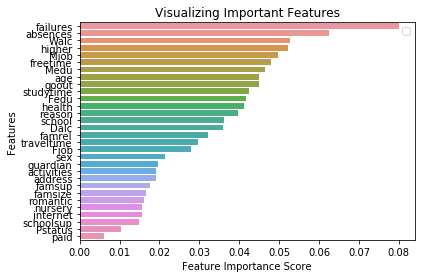

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

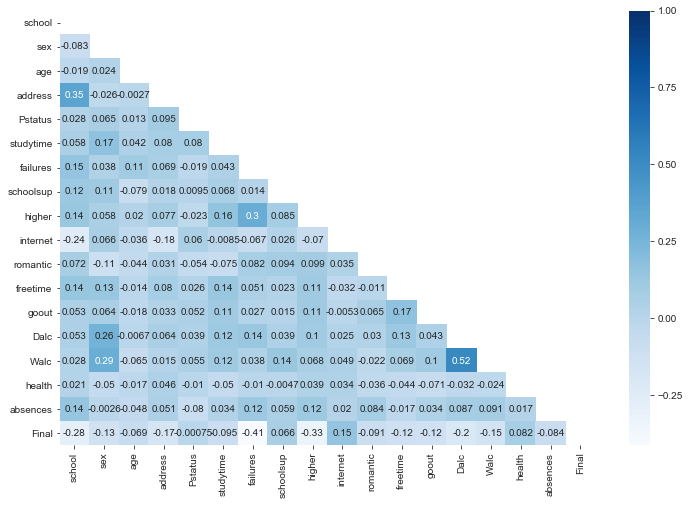

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

data_correlation = data.drop(columns = ['12 or above?','Mjob','Fjob','Medu','Fedu','famsize','activities','nursery','famrel','famsup','reason','traveltime','guardian','paid'])

mask = np.zeros_like(data_correlation.corr())
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots()
fig.set_size_inches(12, 8)

ax = sns.heatmap(data_correlation.corr(), annot = True, mask = mask, cmap="Blues")

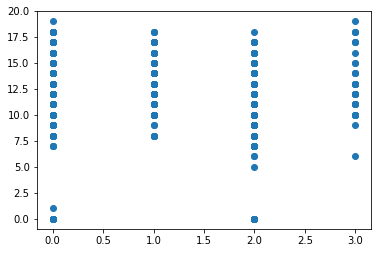

In [34]:
fig, ax = plt.subplots()
school_scatter_plot = ax.scatter(data["studytime"], #X values
data ["inal"]) #Y values
plt.show()

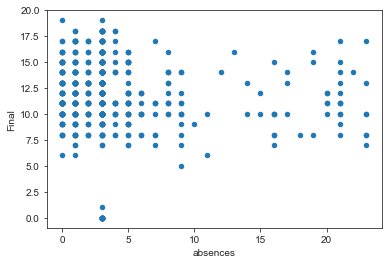

In [39]:
data.plot.scatter(x="absences", y="Final")

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


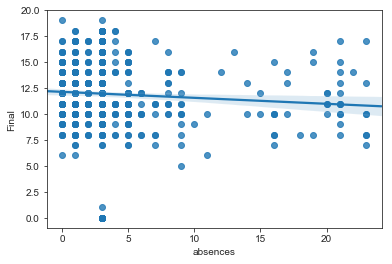

In [43]:
sns.set_style('white')
sns.set_style('ticks')

sns.regplot(x='absences', y='Final',data=data)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


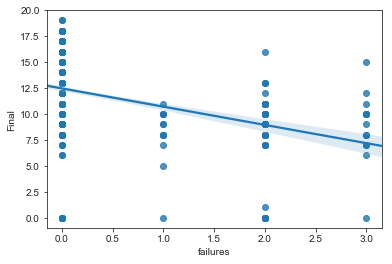

In [45]:
sns.regplot(x='failures', y='Final',data=data)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


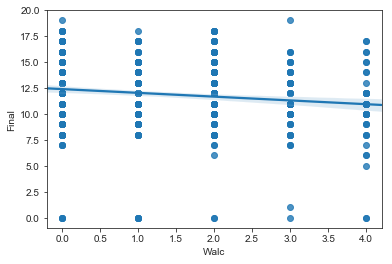

In [46]:
sns.regplot(x='Walc', y='Final',data=data)